In [1]:
from datasets.cifar10 import  CIFAR10Dataset
from datasets.dataset import Subset
from models.cnn import YourCNN
from dlvc.metrics import Accuracy
import torchvision.transforms.v2 as v2
from torch import optim
import torch 
from dlvc.trainer import ImgClassificationTrainer

train_transform = v2.Compose([v2.ToImage(), 
                        v2.ToDtype(torch.float32, scale=True),
                        v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])])

val_transform = v2.Compose([v2.ToImage(), 
                        v2.ToDtype(torch.float32, scale=True),
                        v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])])



In [4]:
model = YourCNN()
optimizer = optim.Adam(model.parameters())
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.09)
loss_fn = torch.nn.CrossEntropyLoss()
train_data = CIFAR10Dataset("../data/cifar-10-python/cifar-10-batches-py", Subset.TRAINING, train_transform)
val_data = CIFAR10Dataset("../data/cifar-10-python/cifar-10-batches-py",Subset.VALIDATION, val_transform)
train_metric = Accuracy(classes=train_data.classes)
val_metric = Accuracy(classes=val_data.classes)
device = torch.device("cpu")

trainer = ImgClassificationTrainer(
    model,
    optimizer,
    loss_fn,
    lr_scheduler,
    train_metric,
    val_metric,
    train_data,
    val_data,
    device,
    num_epochs = 10,
    training_save_dir="weights/simple_cnn_bestmodel.pt",
    batch_size=64,
    val_frequency=1
)

In [5]:
trainer.train()


TRAIN, EPOCH: 0 
Loss: 1.7141425609588623
Accuracy: 0.2005
Class Accuracy: 0.20081713050603867

VALIDATION, EPOCH: 0 
Loss: 1.5214906930923462
Accuracy: 0.3039
Class Accuracy: 0.3039000444114208
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 1.534509539604187
Accuracy: 0.3285
Class Accuracy: 0.32827983498573304

VALIDATION, EPOCH: 1 
Loss: 1.904388666152954
Accuracy: 0.3439
Class Accuracy: 0.34378882199525834
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 1.639884352684021
Accuracy: 0.3454
Class Accuracy: 0.3453572988510132

VALIDATION, EPOCH: 2 
Loss: 1.7207027673721313
Accuracy: 0.3488
Class Accuracy: 0.348670557141304
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 3 
Loss: 1.7968838214874268
Accuracy: 0.3489
Class Accuracy: 0.3487867027521133

VALIDATION, EPOCH: 3 
Loss: 1.617275357246399
Accuracy: 0.3493
Cl

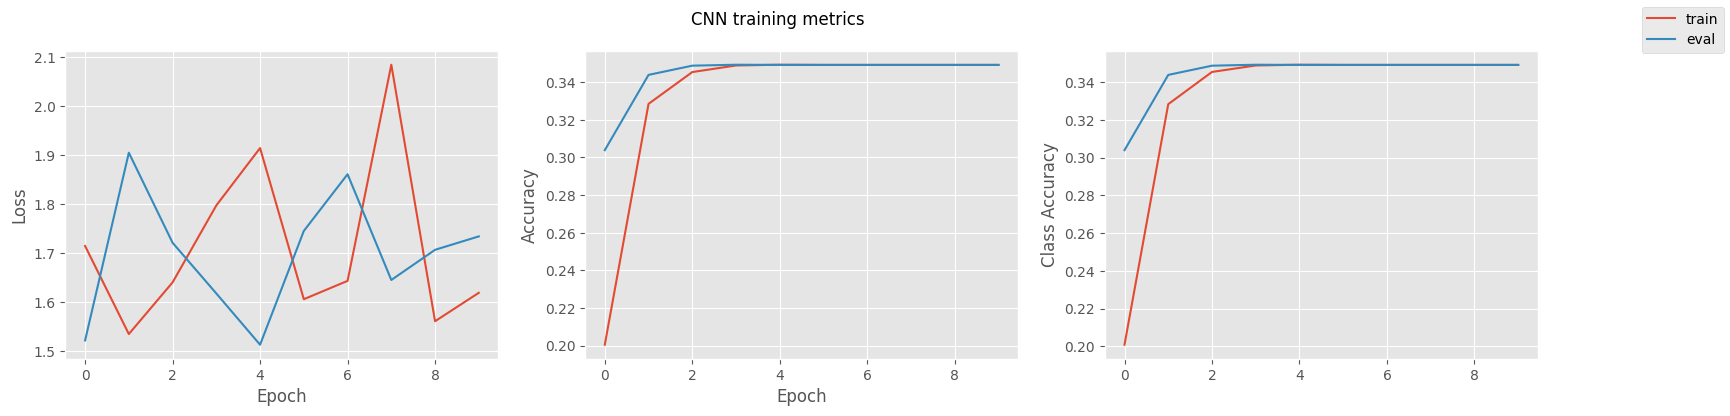

In [8]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

metrics = trainer.metrics_train
metrics = list(zip(*metrics))
loss = metrics[0]
acc = metrics[1]
class_acc = metrics[2]


metrics_val = trainer.metrics_val
metrics_val = list(zip(*metrics_val))
loss_val = metrics_val[0]
acc_val = metrics_val[1]
class_acc_val = metrics_val[2]

fig, ax = plt.subplots(1,3, figsize = (19,4))
ax[0].plot(loss, label = "train")
ax[0].plot(loss_val, label = "eval")
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')

ax[1].plot(acc)
ax[1].plot(acc_val)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')

ax[2].plot(class_acc)
ax[2].plot(class_acc_val)
ax[2].set_ylabel('Class Accuracy')
ax[0].set_xlabel('Epoch')

fig.legend()
fig.suptitle("CNN training metrics")
fig.savefig("../img/simple_cnn_train.png")